<a href="https://colab.research.google.com/github/gabrielasmag/arquivos-student/blob/main/Gabriela_Magalh%C3%A3es_Case_Walmart.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

ANALISE REALIZADA EM ATIVIDADE COM ESCOLA DNC






**Desafio: **Um gestor da área de dados da rede Walmart está em busca de uma 
consultoria  de dados para que possam trazer até ele um maior 
entendimento da relação  existente entre as vendas em dias de feriado 
e dias normais, além de uma  visualização sobre a taxa de desemprego 
em comparação com as vendas



**Etapa 01**

●Você deverá realizar a contagem de feriados e quantidade de dias normais;

● Você deverá calcular as vendas durante os feriados e dias normais

● Você  deverá  plotar  um  gráfico  do  tipo  barras,  em  que  o  eixo  x  seja 
referente a meses  e o eixo y a vendas semanais, onde é possível observar 
as vendas nos dias normais  e os feriados

In [7]:
!pip install numpy
!pip install seaborn
!pip install plotly

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [8]:
# Importando as bibliotecas a serem utilizadas:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go


In [43]:
# Lendo os dados tabulares
data_walmart = pd.read_csv("/content/Walmart.csv")
# Lendo os 5 primeiras linhas:
data_walmart.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


**Quantidade de dias normais e dias que são feriados** 

In [5]:
# Entender os tipos, quantidades de cada coluna e se existem itens nulos/não nulos.
data_walmart.info() 
# OBS: a data aparece como string (object)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [23]:
data_walmart.Holiday_Flag.value_counts()
# A partir desta informação conseguimos fazer a contagem dos feriados, uma vez que: 0 Dias Normais, 1 Feriados,
# logo, temos 450 dias considerados feriados.

0    5985
1     450
Name: Holiday_Flag, dtype: int64

**Você deverá calcular as vendas durante os feriados e dias normais**

In [26]:
# Filtrando os dias que são feriados: 
data_walmart_Holiday_Flag = data_walmart[data_walmart.Holiday_Flag == 1]


In [27]:
# Lendo os dados dos dias que são feriados:
data_walmart_Holiday_Flag

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,month
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106,12
31,1,10-09-2010,1507460.69,1,78.69,2.565,211.495190,7.787,10
42,1,26-11-2010,1955624.11,1,64.52,2.735,211.748433,7.838,11
47,1,31-12-2010,1367320.01,1,48.43,2.943,211.404932,7.838,12
53,1,11-02-2011,1649614.93,1,36.39,3.022,212.936705,7.742,11
...,...,...,...,...,...,...,...,...,...
6375,45,09-09-2011,746129.56,1,71.48,3.738,186.673738,8.625,9
6386,45,25-11-2011,1170672.94,1,48.71,3.492,188.350400,8.523,11
6391,45,30-12-2011,869403.63,1,37.79,3.389,189.062016,8.523,12
6397,45,10-02-2012,803657.12,1,37.00,3.640,189.707605,8.424,10


In [28]:
# Vendas Feriados 
data_walmart_sales_Holiday_Flag = data_walmart_Holiday_Flag.Weekly_Sales.sum()
# Soma das vendas durantes os feriados
data_walmart_sales_Holiday_Flag 

505299551.56

In [29]:
# Filtrando os dias normais:
data_walmart_normal_day = data_walmart[data_walmart.Holiday_Flag == 0]
# Lendo os dados dos dias normais:
data_walmart_normal_day


,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,month
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106,5
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106,2
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106,2
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106,5
5,1,12-03-2010,1439541.59,0,57.79,2.667,211.380643,8.106,12
...,...,...,...,...,...,...,...,...,...
6430,45,28-09-2012,713173.95,0,64.88,3.997,192.013558,8.684,9
6431,45,05-10-2012,733455.07,0,64.89,3.985,192.170412,8.667,5
6432,45,12-10-2012,734464.36,0,54.47,4.000,192.327265,8.667,12
6433,45,19-10-2012,718125.53,0,56.47,3.969,192.330854,8.667,10


In [30]:
# Somando os valores das vendas em dias normais
data_walmart_normal_day = data_walmart[data_walmart.Holiday_Flag == 0]['Weekly_Sales'].sum()
# Soma
data_walmart_normal_day


6231919435.55

**Plotar gráfico com o valor de vendas em dias normais e em dias de feriados.**


In [47]:
# Alterando a estrutura da data para plotagem do gráfico
data_walmart['Date'] =  pd.to_datetime(data_walmart['Date'], format='%d-%m-%Y')
# Lendo arquivo com novo formato de data
data_walmart

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,month
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106,5
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106,12
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,2
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,2
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106,5
...,...,...,...,...,...,...,...,...,...
6430,45,2012-09-28,713173.95,0,64.88,3.997,192.013558,8.684,9
6431,45,2012-10-05,733455.07,0,64.89,3.985,192.170412,8.667,5
6432,45,2012-10-12,734464.36,0,54.47,4.000,192.327265,8.667,12
6433,45,2012-10-19,718125.53,0,56.47,3.969,192.330854,8.667,10


In [48]:
data_walmart['month'] = pd.DatetimeIndex(data_walmart['Date']).month

In [49]:
data_walmart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         6435 non-null   int64         
 1   Date          6435 non-null   datetime64[ns]
 2   Weekly_Sales  6435 non-null   float64       
 3   Holiday_Flag  6435 non-null   int64         
 4   Temperature   6435 non-null   float64       
 5   Fuel_Price    6435 non-null   float64       
 6   CPI           6435 non-null   float64       
 7   Unemployment  6435 non-null   float64       
 8   month         6435 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(3)
memory usage: 452.6 KB


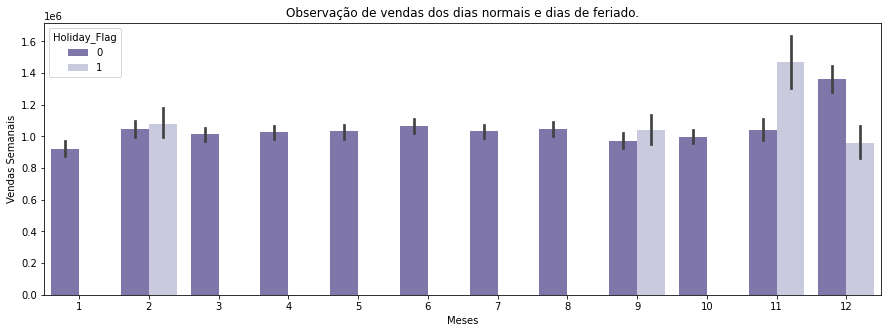

In [50]:
plt.figure(figsize=(15,5))
sns.barplot(x = 'month',
            y = 'Weekly_Sales',
            hue = 'Holiday_Flag',
            palette = 'Purples_r',
            data = data_walmart)
plt.title('Observação de vendas dos dias normais e dias de feriado.');
plt.xlabel('Meses')
plt.ylabel('Vendas Semanais');

**ETAPA 2**

**Plotar um gráfico do preço mensal da gasolina em dias normais e feriados.**

In [35]:
# Usamos o mesmo insight que anteriormente, porém calculando agora a média do valor da gasolina 
# conforme dias de feriados.
data_walmart_Holiday_Flag.Fuel_Price.mean()

3.2274644444444442

In [41]:
# Usamos o mesmo insight que anteriormente, porém calculando agora a média do valor da gasolina 
# conforme dias normais.
data_walmart_normal_day_Fuel = data_walmart[data_walmart.Holiday_Flag == 0]['Fuel_Price'].mean()
data_walmart_normal_day_Fuel

3.3684671679197993

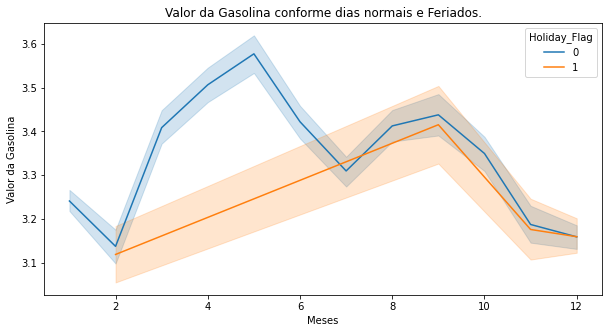

In [57]:
plt.figure(figsize=(10,5))
sns.lineplot(data=data_walmart, x = "month", y="Fuel_Price", hue="Holiday_Flag")
plt.xlabel('Meses')
plt.ylabel('Valor da Gasolina')
plt.title('Valor da Gasolina conforme dias normais e Feriados.');

**ETAPA 3**

**Plotar um gráfico de dispersão para observar a taxa de desemprego por quantidade de vendas.**

In [58]:
data_walmart.groupby(['month']).agg({'Fuel_Price': 'max'}).sort_values('Fuel_Price',ascending = False).reset_index()


,month,Fuel_Price
0,10,4.468
1,5,4.308
2,3,4.294
3,4,4.282
4,6,4.277
5,9,4.203
6,8,4.093
7,7,4.004
8,2,3.950
9,11,3.828


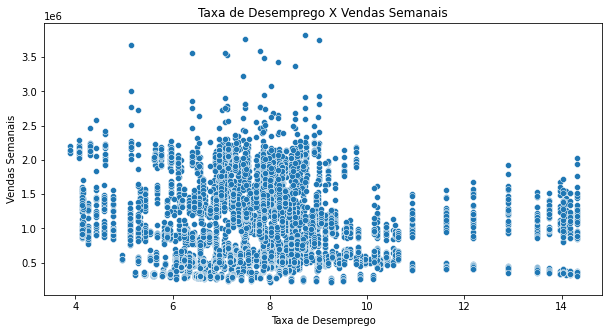

In [60]:
plt.figure(figsize=(10,5))
sns.scatterplot(data=data_walmart, x = "Unemployment", y = "Weekly_Sales")
plt.xlabel('Taxa de Desemprego')
plt.ylabel('Vendas Semanais')
plt.title('Taxa de Desemprego X Vendas Semanais');


In [64]:
import plotly.express as px
import plotly.graph_objects as go

fig = px.scatter(data_walmart, x="Unemployment", y="Weekly_Sales", size = "Weekly_Sales", color = 'Store',
                 title="Vendas Semanais por Desemprego")

fig.show()

A taxa de empregabilidade afeta na quantidade de vendas? 

*Sim, pois os consumidores perdem poder de compra*

Qual o mês que tem o maior valor da gasolina?

*Maio*

Por qual possível motivo novembro tem o maior número de vendas nos feriados? 

*Feriado de ação de graças pode ter impactado no maior número de vendas*

